In [1]:
import os
os.chdir('..')
from notebooks import config
import geopandas as gpd
import numpy as np
from utils.geotif_io import readTiff, writeTiff
from utils.imgShow import imgShow
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.colors import LinearSegmentedColormap
from matplotlib_scalebar.scalebar import ScaleBar
from osgeo import gdal
from glob import glob
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader


In [3]:
path_vector =config.root_proj +  '/data/tibet/tibet_tiles_vec/tibet_tiles.gpkg'    
tiles_gdf = gpd.read_file(path_vector)
tiles_gdf.head()


,area,proj,tile_id,geometry
0,10852.910371,EPSG: 32646,001,"MULTIPOLYGON (((91.60292 25.97742, 91.60292 26..."
1,10856.066053,EPSG: 32646,002,"MULTIPOLYGON (((92.59904 25.97742, 92.59904 26..."
2,10853.222782,EPSG: 32647,003,"MULTIPOLYGON (((97.64819 25.97742, 97.64819 26..."
3,10856.025776,EPSG: 32647,004,"MULTIPOLYGON (((98.64468 25.97742, 98.64468 26..."
4,10850.995157,EPSG: 32647,005,"MULTIPOLYGON (((99.64905 25.97742, 99.64905 26..."


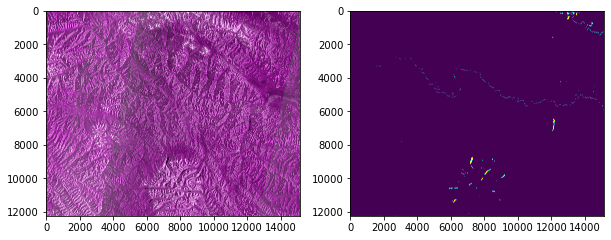

In [4]:
# ## check the prediction water map
# ## -- data path
date = '202011'
tile_id = '175'
path_s1_img = config.root_tb_data + '/tibet-'+date+'/s1_descend/tibet_s1des_'+date+'_tile_' + tile_id + '.tif'
path_wat = config.root_tb_data + '/tibet-'+date+'/s1_water/tibet_s1_'+date+'_tile_' + tile_id + '_water.tif' 

## -- data read
s1_img_tile, s1_img_tile_info = readTiff(path_in = path_s1_img)
s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
## -- data visualization
plt.figure(figsize=(10,5))
## plot s1 image
plt.subplot(1,2,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2)
# imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2, focus_pix=[2000,4000,1000,4000])
## plot water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2)
# imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2, focus_pix=[2000,4000,1000,4000])


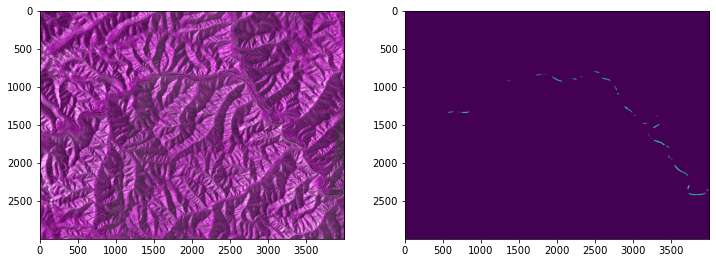

In [5]:
plt.figure(figsize=(12,8))
region = [2000,5000,1000,5000]
plt.subplot(1,2,1)
imgShow(s1_img_tile, color_bands=(0,1,0), clip_percent=2, focus_pix=region)
## plot water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, color_bands=(0,1,0), clip_percent=2, focus_pix=region)


## Check debuffered image

In [7]:
## check
## -- data path
tile_id = '201'
path_s1_img = config.root_tb_data + '/tibet-202011/s1_ascend/tibet_s1as_202011_tile_' + tile_id + '.tif'
path_wat = config.root_tb_data + '/tibet-202011/s1_water/tibet_s1_202011_tile_' + tile_id + '_water_debuf.tif'
## -- data read
s1_img_tile, s1_img_tile_info = readTiff(path_in = path_s1_img)
s1_tile_wat, s1_tile_wat_info = readTiff(path_in = path_wat)
## -- get tile region
idx, = np.where(tiles_gdf['tile_id'].values == tile_id)
tile_region = tiles_gdf.loc[int(idx)]['geometry'].bounds



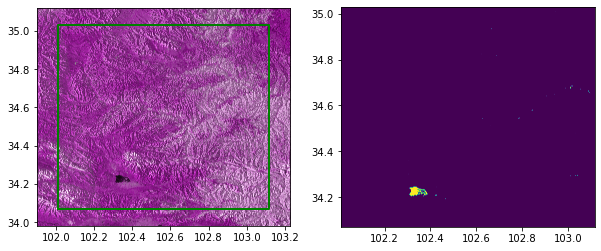

In [9]:
plt.figure(figsize=(10,5))
## plot s1 image
plt.subplot(1,2,1)
imgShow(s1_img_tile, extent=s1_img_tile_info['geoextent'], color_bands=(0,1,0), clip_percent=2)
# outline
outline_x = [tile_region[0],tile_region[2], tile_region[2], tile_region[0],tile_region[0]]  
outline_y = [tile_region[1], tile_region[1], tile_region[3], tile_region[3], tile_region[1]]
plt.plot(outline_x, outline_y, color='g', linewidth=2)
## plot subsetted water map
plt.subplot(1,2,2)
imgShow(s1_tile_wat, extent=s1_tile_wat_info['geoextent'], color_bands=(0,1,0), clip_percent=2)
